Step 1 : Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


Step 2 : Loading The Dataset

In [26]:
file_path = r'C:\Users\Nikhil\Downloads\Iris.csv'
df = pd.read_csv(file_path)
print("Dataset Preview:")
print(df.head())


Dataset Preview:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


Step 3 : Exploratory Data Analytics [EDA]


Missing Values:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Dataset Summary:
                Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

Class Distribution:
 Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


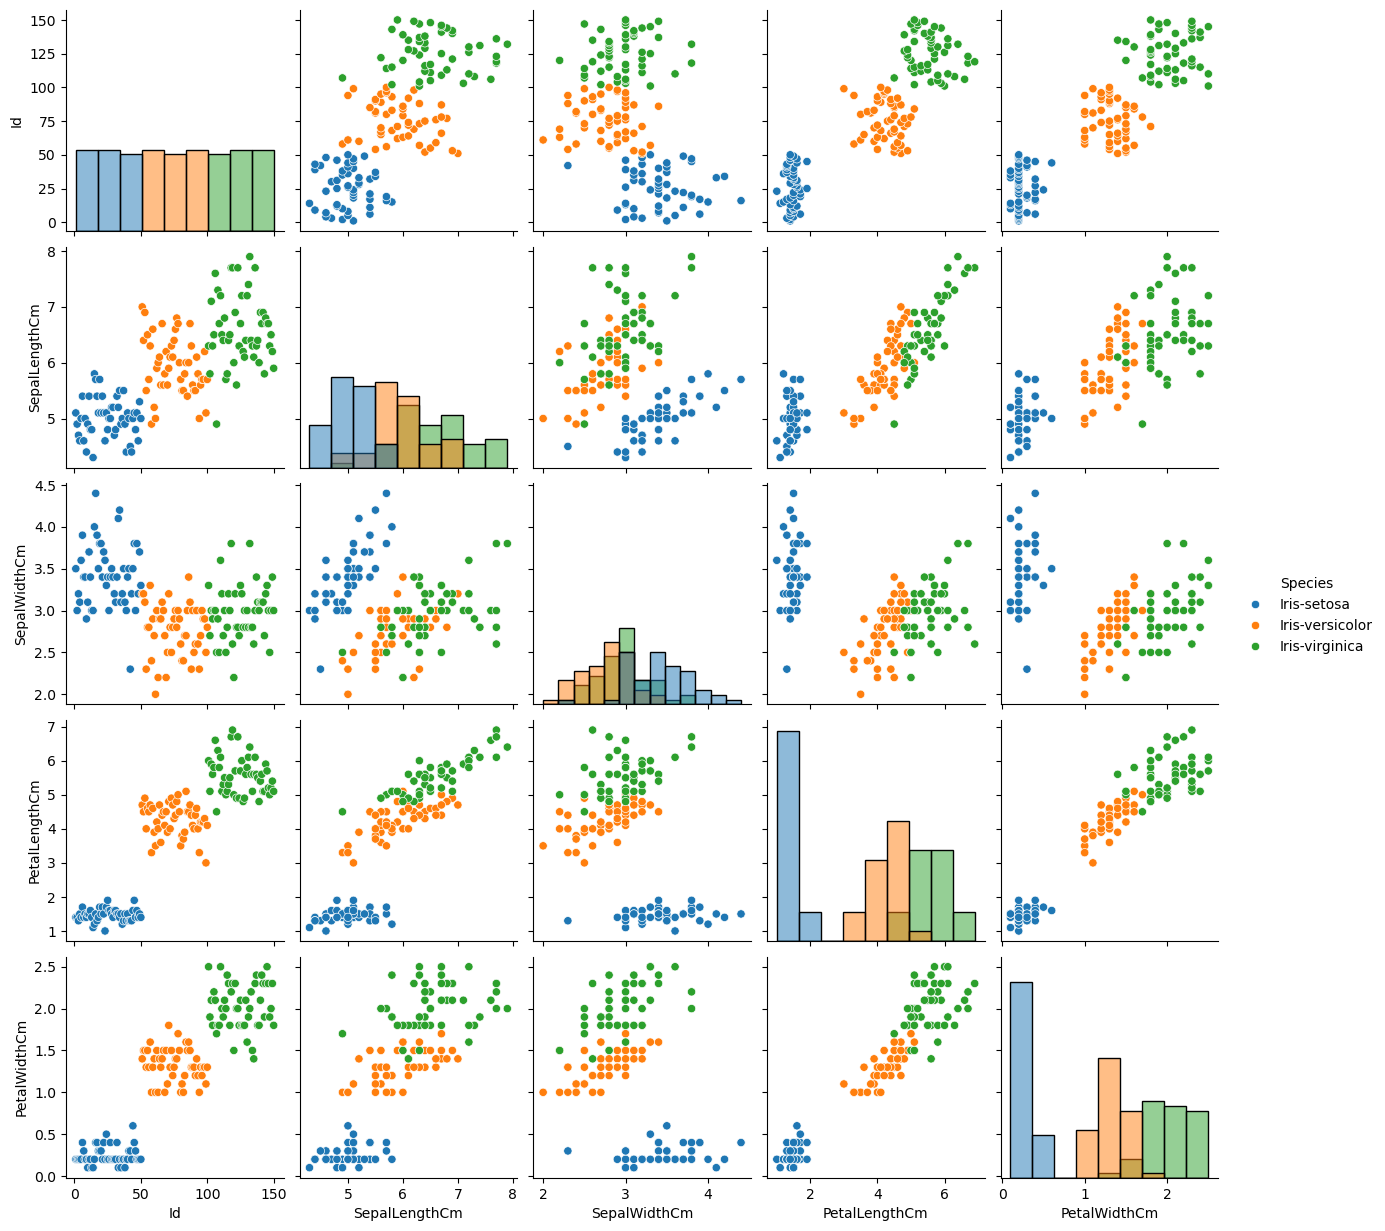

In [29]:
print("\nMissing Values:\n", df.isnull().sum())
print("\nDataset Summary:\n", df.describe())
print("\nClass Distribution:\n", df['Species'].value_counts())
sns.pairplot(df, hue='Species', diag_kind='hist')
plt.show()


Step 4 : Data Preprocessing Process

In [32]:
if 'Id' in df.columns:
    df.drop(columns=['Id'], inplace=True)
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])
X = df.drop(columns=['Species'])
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)



Training Set Shape: (120, 4)
Testing Set Shape: (30, 4)


Step 5 : Training A Machine Learning Model 

In [37]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [39]:
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


Step 6 : Evaluating The Model


Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



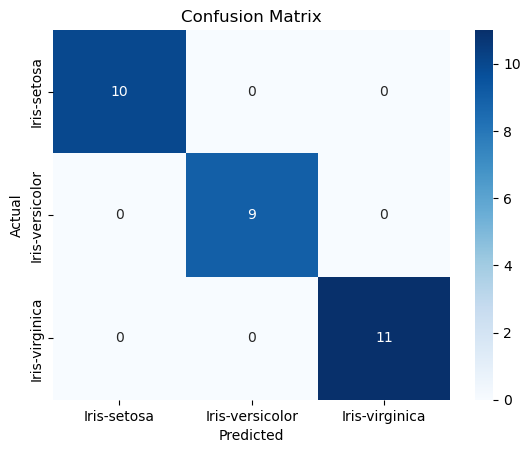

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
